# **ЛР №2-4**: Работа со скалярными полями в Python (NumPy)

**Цель работы:**  

Научиться создавать и обрабатывать скалярные поля, привязанные к облакам точек с помощью Python и NumPy. Закрепить навыки обработки численных массивов, визуализации и анализа данных.

In [43]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d
import pandas as pd

In [44]:
try:
    import open3d as o3d
    pcd = o3d.io.read_point_cloud("key.ply")
    if len(pcd.points) == 0:
        raise ValueError("Точки отсутствуют")
    
    xyz = np.asarray(pcd.points)
    print(f"Успешно загружено {xyz.shape[0]} точек из 'b1.ply'.")
    
except Exception as e:
    print(f"Не удалось загрузить 'b1.ply' ({type(e).__name__}): {e}")
    
    N = 500
    np.random.seed(42)
    xyz = np.random.uniform(-10, 10, size=(N, 3))
    np.savetxt('cloud.txt', xyz, fmt='%.4f')
    print(f"Сгенерировано {xyz.shape[0]} точек.")

print(f"\n Форма данных: {xyz.shape}")
print("Первые 3 точки:\n", xyz[:3])

Успешно загружено 493125 точек из 'b1.ply'.

 Форма данных: (493125, 3)
Первые 3 точки:
 [[-26.76118088   0.29484999  -0.208158  ]
 [-26.74350357   0.32319701  -0.220708  ]
 [-26.75220871   0.30149701  -0.23548   ]]


## Задание 2: Добавить скалярное поле с постоянным значением

In [45]:
def create_constant_scalar(n_points, value=10.0):
    return np.full(n_points, value)

scalar_field = create_constant_scalar(xyz.shape[0], value=10.0)

print("Скалярное поле (первые 5 значений):", scalar_field[:5])
print("Варианты:")
print("   value=5  →", create_constant_scalar(xyz.shape[0], 5)[:3])
print("   value=15 →", create_constant_scalar(xyz.shape[0], 15)[:3])
print("   value=-3.5 →", create_constant_scalar(xyz.shape[0], -3.5)[:3])

Скалярное поле (первые 5 значений): [10. 10. 10. 10. 10.]
Варианты:
   value=5  → [5 5 5]
   value=15 → [15 15 15]
   value=-3.5 → [-3.5 -3.5 -3.5]


## Задание 2: Умножить скалярное поле на число

In [ ]:
scalar_field_original = scalar_field.copy()

scalar_field *= 2
print("После ×2:", scalar_field[:5])

print("\nВарианты умножения (на базе исходного поля):")
print(" ×0.5  :", (scalar_field_original * 0.5)[:3])
print(" ×(-1) :", (scalar_field_original * -1)[:3])
print(" ×3    :", (scalar_field_original * 3)[:3])

После ×2: [20. 20. 20. 20. 20.]

Варианты умножения (на базе исходного поля):
 ×0.5  : [5. 5. 5.]
 ×(-1) : [-10. -10. -10.]
 ×3    : [30. 30. 30.]


## Задание 3: Добавить число к значениям скалярного поля

In [ ]:
scalar_field += 5
print("После +5:", scalar_field[:5])

scalar_field = scalar_field_original.copy() * 2 + 5
print("Текущее поле (const=25):", scalar_field[:3])

После +5: [25. 25. 25. 25. 25.]
Текущее поле (const=25): [25. 25. 25.]


# Задание 4: Применить гауссов фильтр (сглаживание)

Исходное поле (первые 8): [25. 25. 25. 25. 25. 25. 25. 25.]
σ=1 → [25. 25. 25. 25. 25. 25. 25. 25.]
σ=2 → [25. 25. 25. 25. 25. 25. 25. 25.]
σ=5 → [25. 25. 25. 25. 25. 25. 25. 25.]


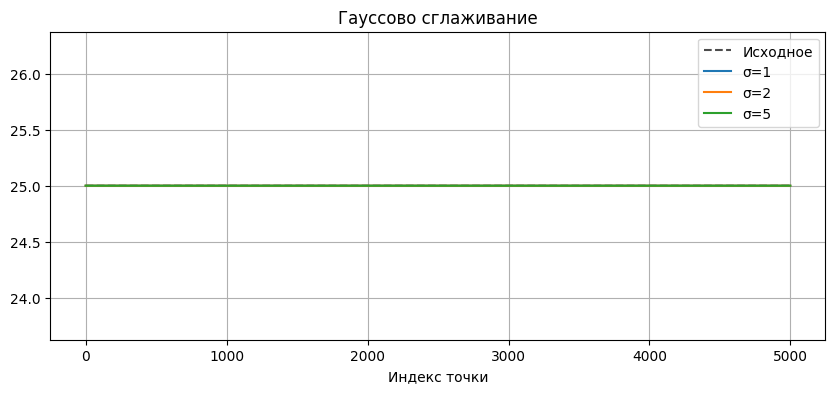

In [ ]:
sigma_vals = [1, 2, 5]
smoothed = {}
for s in sigma_vals:
    smoothed[s] = gaussian_filter1d(scalar_field, sigma=s)

print("Исходное поле (первые 8):", scalar_field[:8])
for s in sigma_vals:
    print(f"σ={s} →", smoothed[s][:8])

x = np.arange(5000)
plt.figure(figsize=(10, 4))
plt.plot(x, scalar_field[:5000], 'k--', label='Исходное', alpha=0.7)
for s in sigma_vals:
    plt.plot(x, smoothed[s][:5000], label=f'σ={s}')
plt.legend(); plt.grid(); plt.title('Гауссово сглаживание'); plt.xlabel('Индекс точки')
plt.show()

## Задание 5: Вычислить градиент скалярного поля

In [ ]:
grad_raw = np.gradient(scalar_field)
print("Градиент (равномерное поле → почти ноль):", grad_raw[:10])

dist_field = np.linalg.norm(xyz, axis=1)
grad_dist = np.gradient(dist_field)
print("\nГрадиент поля расстояния (первые 5):", grad_dist[:5])

Градиент (равномерное поле → почти ноль): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Градиент поля расстояния (первые 5): [-0.01724756 -0.00433538 -0.81406436 -0.83439871  0.0236022 ]


## Задание 6: Повторное сглаживание (скользящее среднее)

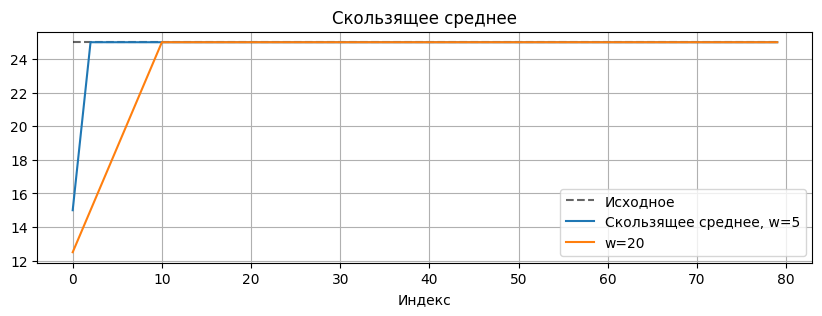

In [ ]:
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

ma3 = moving_average(scalar_field, 3)
ma5 = moving_average(scalar_field, 5)
ma20 = moving_average(scalar_field, 20)

x = np.arange(80)
plt.figure(figsize=(10, 3))
plt.plot(x, scalar_field[:80], 'k--', label='Исходное', alpha=0.6)
plt.plot(x, ma5[:80], label='Скользящее среднее, w=5')
plt.plot(x, ma20[:80], label='w=20')
plt.legend(); plt.grid(); plt.title('Скользящее среднее'); plt.xlabel('Индекс')
plt.show()

# Задание 7: Преобразовать скалярное поле в RGB цвета

In [ ]:
def scalar_to_rgb(scalar, cmap='viridis'):
    normed = (scalar - scalar.min()) / (scalar.max() - scalar.min() + 1e-8)
    return plt.cm.get_cmap(cmap)(normed)[:, :3]

colors = scalar_to_rgb(dist_field, 'plasma')
print("Цвета (RGB, первые 3):")
for i in range(3):
    print(f"  точка {i}: {colors[i]}")

Цвета (RGB, первые 3):
  точка 0: [0.993482 0.765499 0.156891]
  точка 1: [0.993482 0.765499 0.156891]
  точка 2: [0.993482 0.765499 0.156891]


/tmp/ipykernel_99490/1748606539.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  return plt.cm.get_cmap(cmap)(normed)[:, :3]


## Задание 8: Вычислить статистические параметры

In [ ]:
sf = dist_field
mean_val = sf.mean()
std_val = sf.std()
min_val = sf.min()
max_val = sf.max()

stats = pd.DataFrame({
    'Метрика': ['Среднее', 'Стд. откл.', 'Минимум', 'Максимум'],
    'Значение': [f"{mean_val:.3f}", f"{std_val:.3f}", f"{min_val:.3f}", f"{max_val:.3f}"]
})
print("Статистика поля расстояния:")
display(stats)

Статистика поля расстояния:


,Метрика,Значение
0,Среднее,17.610
1,Стд. откл.,6.474
2,Минимум,0.948
3,Максимум,30.564


## Задание 9: Нормализовать значения в диапазон [0, 1]

In [ ]:
normed = (sf - min_val) / (max_val - min_val + 1e-8)

print(f"До: min={sf.min():.2f}, max={sf.max():.2f}")
print(f"После: min={normed.min():.2f}, max={normed.max():.2f}")
print("Первые 5 нормализованных значений:", normed[:5])

До: min=0.95, max=30.56
После: min=0.00, max=1.00
Первые 5 нормализованных значений: [0.87168949 0.87110711 0.87139672 0.81613154 0.81504792]


## Задание 10: Интерполировать скалярное поле (заполнение пропусков)

In [ ]:
sf_with_nan = sf.copy()
nan_idx = np.random.choice(len(sf), 20, replace=False)
sf_with_nan[nan_idx] = np.nan

def interpolate_nan(data):
    mask = np.isnan(data)
    if not mask.any():
        return data
    x = np.arange(len(data))
    f = interp1d(x[~mask], data[~mask], kind='linear', 
                 bounds_error=False, fill_value="extrapolate")
    return f(x)

filled = interpolate_nan(sf_with_nan)

print(f"Было NaN: {np.isnan(sf_with_nan).sum()}")
print(f"Стало NaN: {np.isnan(filled).sum()}")
print("\nПримеры заполнения (индексы):", nan_idx[:5])
for i in nan_idx[:5]:
    print(f"  {i}: было {sf_with_nan[i]:.2f} → стало {filled[i]:.2f}")

Было NaN: 20
Стало NaN: 0

Примеры заполнения (индексы): [458512 468098  23190 396581 213061]
  458512: было nan → стало 5.71
  468098: было nan → стало 9.05
  23190: было nan → стало 20.12
  396581: было nan → стало 13.43
  213061: было nan → стало 23.81


# Задание 11: Фильтрация по значению скалярного поля

In [59]:
mask = (sf >= 10) & (sf <= 20)
filtered_xyz = xyz[mask]

print(f"Всего точек: {len(xyz)}")
print(f"В диапазоне [10, 20]: {len(filtered_xyz)} точек ({len(filtered_xyz)/len(xyz)*100:.1f}%)")

print("\nДругие диапазоны:")
print(f"  [0, 5]    → {((sf >= 0) & (sf < 5)).sum()} точек")
print(f"  [15, ∞)   → {(sf >= 15).sum()} точек")

Всего точек: 493125
В диапазоне [10, 20]: 227665 точек (46.2%)

Другие диапазоны:
  [0, 5]    → 23917 точек
  [15, ∞)   → 335509 точек


## Задание 12: Использовать скалярное поле как координату

In [ ]:
xyz_new = xyz.copy()
xyz_new[:, 2] = sf

print("До замены Z (3 точки):\n", xyz[:3])
print("\nПосле замены Z:\n", xyz_new[:3])

До замены Z (3 точки):
 [[-26.76118088   0.29484999  -0.208158  ]
 [-26.74350357   0.32319701  -0.220708  ]
 [-26.75220871   0.30149701  -0.23548   ]]

После замены Z:
 [[-26.76118088   0.29484999  26.76361463]
 [-26.74350357   0.32319701  26.74636707]
 [-26.75220871   0.30149701  26.75494388]]


## Задание 13: Удалить скалярное поле

In [ ]:
print("До: переменная 'scalar_field' существует?", 'scalar_field' in globals())

del scalar_field

До: переменная 'scalar_field' существует? True


## Визуализация

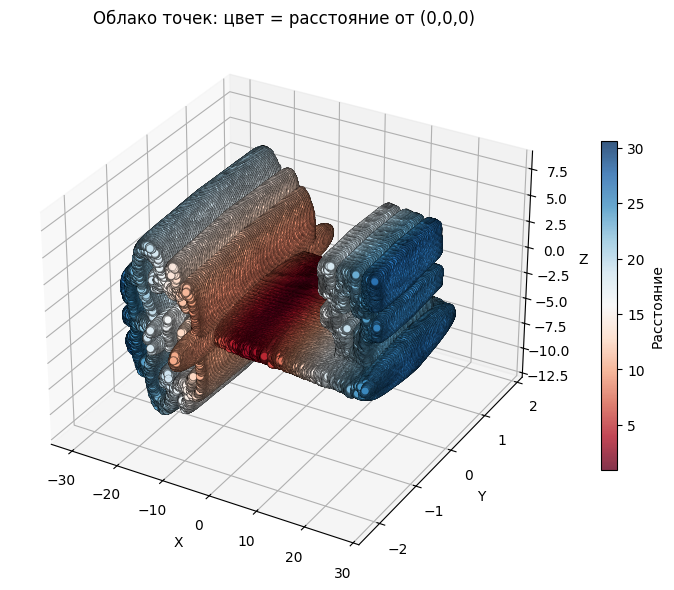

In [58]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2],
                c=sf, cmap='RdBu', s=30, alpha=0.8, edgecolor='k', linewidth=0.2)

ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.set_title('Облако точек: цвет = расстояние от (0,0,0)')
plt.colorbar(sc, ax=ax, label='Расстояние', shrink=0.6)
plt.tight_layout()
plt.show()

## Выводы

В ходе работы были получены навыки создания и обрабатки скалярных поля, привязанных к облакам точек, с использованием Python и библиотек NumPy, SciPy и matplotlib.  

Наиболее полезными оказались операции нормализации, сглаживания (гауссов фильтр и скользящее среднее) и фильтрации по значению — они позволяют очищать и готовить данные к анализу или визуализации.  

Работа со скалярными полями имеет прямое применение в реальных задачах: например, в данных LIDAR скалярным полем может быть высота, интенсивность отражения или класс объекта, что важно для картографии, автономного транспорта и 3D-моделирования.  

Я убедился, что даже простые операции — умножение, сдвиг, интерполяция — позволяют эффективно управлять данными и улучшать качество представления облака точек.